In [1]:
from movielens_loader import MovielensLoader
from pathlib import Path
loader=MovielensLoader(data_dir=Path("./ml-100k"))

In [2]:
X_train,y_train,X_test,y_test=loader.create_dataset(include_user_features=True,include_item_features=False)

In [3]:
X_train.toarray().shape,X_test.toarray().shape

((90570, 2646), (9430, 2646))

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np

def get_rmse(model,X, y):
    y_pred=model.predict(X)
    return np.sqrt(mean_squared_error(y_pred, y))

def train(model,X_train,y_train,n_iter,iter_size=1):
    model.fit(X_train,y_train) # initのためにこれが必要
    rmse_hist=[]
    iter_size=1
    for i in range(n_iter):
        model.fit(X_train, y_train,n_more_iter=iter_size)
        rmse_train=get_rmse(model,X_train,y_train)
        rmse_hist.append(rmse_train)
    
        if (i+1)%10==0: 
            print(f" epoch = {i+1}, Train RMSE : {rmse_train: 0.4f}")
    return model,rmse_hist

In [5]:
from fastFM import als,sgd
model = als.FMRegression(n_iter=0, l2_reg_w=0.1, l2_reg_V=0.1, rank=10)

model,history=train(model,X_train,y_train, n_iter=100)

 epoch = 10, Train RMSE :  0.6790
 epoch = 20, Train RMSE :  0.6639
 epoch = 30, Train RMSE :  0.6584
 epoch = 40, Train RMSE :  0.6552
 epoch = 50, Train RMSE :  0.6531
 epoch = 60, Train RMSE :  0.6517
 epoch = 70, Train RMSE :  0.6506
 epoch = 80, Train RMSE :  0.6498
 epoch = 90, Train RMSE :  0.6492
 epoch = 100, Train RMSE :  0.6488


In [6]:
y_pred=model.predict(X_test)

In [7]:
y_train_mean=y_train.mean()*np.ones(len(y_test))

In [8]:
print(f"[FM] : RMSE = {get_rmse(model,X_test,y_test):0.4f}")
print(f"[Baseline] : RMSE = {np.sqrt(mean_squared_error(y_train_mean, y_test)):0.4f}")

[FM] : RMSE = 1.3994
[Baseline] : RMSE = 1.1220


In [9]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("n_iter")
    plt.ylabel("RMSE")
    n_iter=len(history)
    # Traing score と Test score をプロット
    plt.plot(list(range(1,n_iter+1)), history, label="train loss")
    plt.legend()
    plt.show()

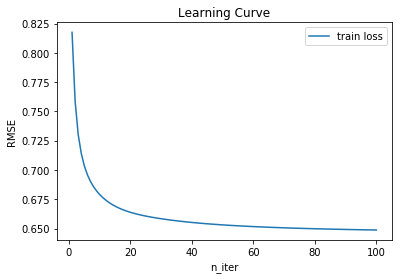

In [10]:
plot_learning_curve(history)